In [7]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd

import nltk
from konlpy.tag import Okt

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from wordcloud import WordCloud
from PIL import Image
from wordcloud import ImageColorGenerator


In [ ]:
import csv
 
f = open('max_token.csv', 'r', encoding='CP949')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()    

In [13]:
word_cleaned=line

In [14]:
word_dic = {}

for word in word_cleaned:
    if word not in word_dic: # 처음 등장할 시
        word_dic[word] = 1
    else: # 추가 등장시 count ++
        word_dic[word] += 1


In [ ]:
word_dic

In [21]:
word_dic.items()

dict_items([('당일', 5), ('여행', 59), ('크다', 95), ('편의점', 856), ('건너편', 10), ('넓다', 11), ('한국', 11), ('올라가다', 14), ('사람', 113), ('만이', 9), ('미터', 4), ('하니', 13), ('찌다', 21), ('블챌', 129), ('새롭다', 68), ('시작', 58), ('생각', 95), ('경계', 4), ('수도', 9), ('팔다', 81), ('짜다', 73), ('마시다', 28), ('뭔가', 21), ('많아지다', 3), ('미루다', 4), ('씻다', 12), ('갈다', 46), ('클립', 3), ('가발', 6), ('불편하다', 6), ('편하다', 29), ('목포', 3), ('전문점', 4), ('남자', 11), ('전문', 5), ('엄마', 80), ('여자', 20), ('앞머리', 3), ('대여', 6), ('전체', 7), ('사랑', 49), ('완벽하다', 6), ('호떡', 9), ('따로', 11), ('먹다', 1003), ('잔뜩', 17), ('기대하다', 12), ('남기다', 14), ('다시다', 9), ('보지', 6), ('스파게티', 3), ('요리사', 3), ('야식', 21), ('파티', 18), ('탐방', 6), ('수영', 5), ('맛있다', 321), ('터지다', 10), ('적당하다', 4), ('일기', 225), ('제주도', 13), ('밀크', 34), ('피다', 6), ('숙소', 38), ('돌아오다', 25), ('들르다', 27), ('드디어', 55), ('우무', 15), ('아이스크림', 63), ('만나다', 49), ('커스터드', 11), ('계란', 15), ('제주', 46), ('신한', 4), ('플레이', 5), ('퀴즈', 21), ('위드', 3), ('포켓', 62), ('씨유', 997), ('올리다', 34), ('티머니', 9

In [22]:
del word_dic['씨유']

In [24]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [25]:
sorted_word_dic = sorted(word_dic.items(), key = lambda x:x[1], reverse = True)


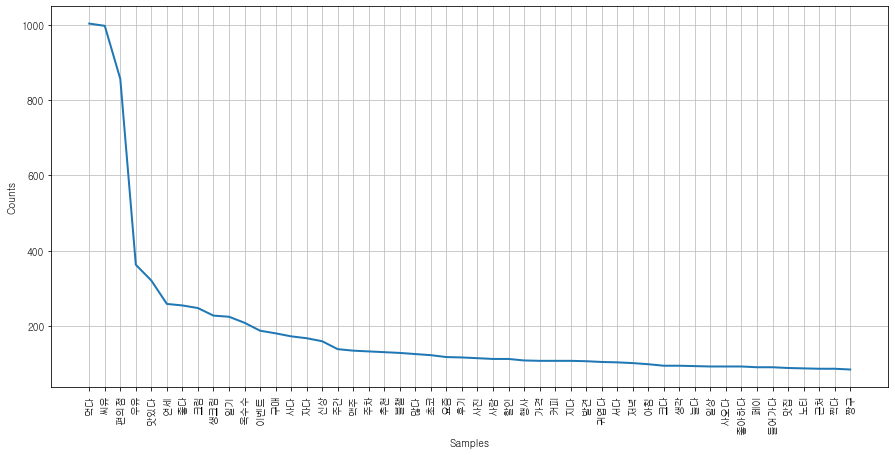

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
word_counted = nltk.Text(word_cleaned)
plt.figure(figsize=(15, 7))
word_counted.plot(50)


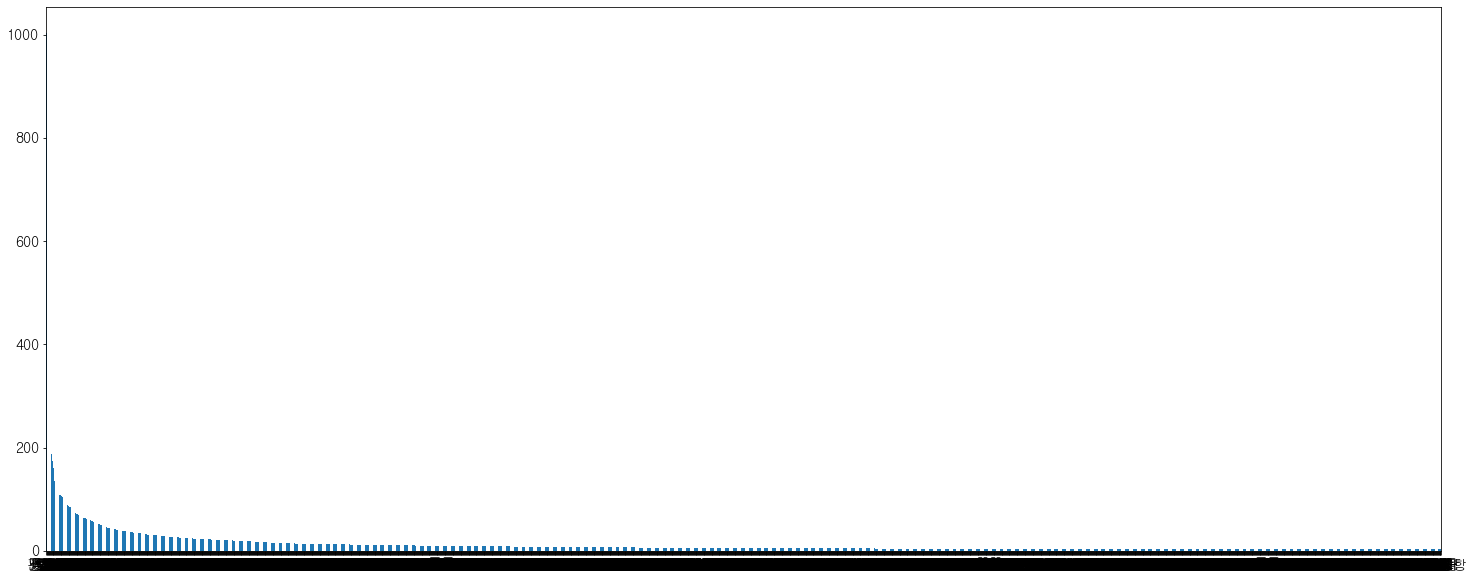

In [27]:
word_frequency = nltk.FreqDist(word_cleaned) # 단어 빈도 계산

# {단어(key): 수(value)} -> 데이터프레임
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 빈도 내림차순 정렬
result = df.sort_values([0], ascending=False)

# matplot 그래프
result.plot(kind = 'bar', legend = False, figsize = (25,10), rot=0, fontsize=14) # 'bar' graph
plt.show()


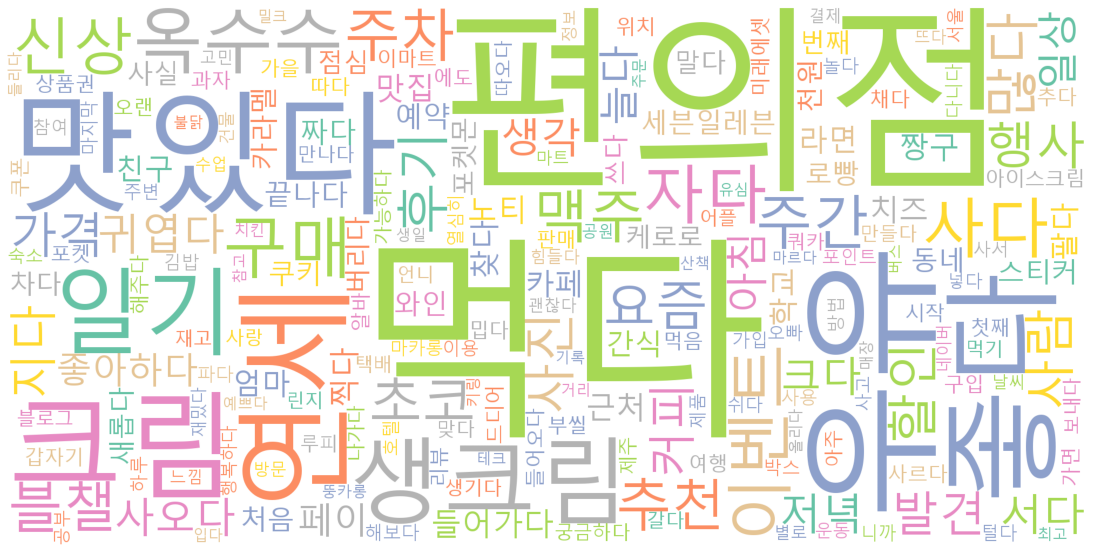

In [28]:
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # 폰트설정
                       width=2000, height=1000, # 워드클라우드 크기(해상도)
                       prefer_horizontal= 0.8, # 가로방향 단어 비율 (0~1)
                       background_color='white',
                       colormap = 'Set2')
                       
word_cloud.generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [29]:
word_cloud.to_file('word_cloud_heart.png')
